In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'../data/train_set.csv')

C:\Users\jacj2\AppData\Local\Temp\ipykernel_11136\2044410893.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'../data/train_set.csv')


In [3]:
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_lat',
       'start_lon', 'end_lat', 'end_lon', 'bike_id', 'plan_duration',
       'trip_route_category', 'passholder_type', 'start_station',
       'end_station'],
      dtype='object')

In [4]:
df.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443


In [5]:
# Función para calcular la distancia usando la fórmula de Haversine
def haversine(lat1, lon1, lat2, lon2):
    # Convertir de grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Fórmula de Haversine
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radio de la Tierra en kilómetros
    return c * r

# Aplicar la función de Haversine para calcular la distancia
df['distance_km'] = df.apply(lambda row: haversine(row['start_lat'], row['start_lon'], row['end_lat'], row['end_lon']), axis=1)

print(df['distance_km'][:5])

0    0.000000
1    2.878823
2    0.947198
3    0.529683
4    0.523125
Name: distance_km, dtype: float64


In [6]:
df.sort_values(by='distance_km',ascending=False)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station,distance_km
248128,28609706,42,2017-05-23 13:48:00,2017-05-23 14:30:00,34.025959,118.238258,34.063389,-118.236160,06577,30.0,One Way,Monthly Pass,3039,3066,10426.960898
533743,143464019,20,6/13/2020 11:23,6/13/2020 11:43,33.958790,-118.448280,55.705528,37.606541,15173,1.0,One Way,Walk-up,4504,4496,9788.569359
392863,141931228,26,5/13/2020 14:22,5/13/2020 14:48,55.705528,37.606541,33.958790,-118.448280,15081,1.0,One Way,One Day Pass,4496,4504,9788.569359
275751,142175722,26,5/18/2020 14:55,5/18/2020 15:21,55.705528,37.606541,33.958790,-118.448280,15899,1.0,One Way,Walk-up,4496,4504,9788.569359
376925,143514874,89,6/14/2020 11:38,6/14/2020 13:07,55.705528,37.606541,33.958790,-118.448280,15173,1.0,One Way,One Day Pass,4496,4504,9788.569359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699859,106383965,4,2018-09-30 11:32:00,2018-09-30 11:36:00,34.053200,-118.250954,NaN,NaN,12364,1.0,One Way,Walk-up,3068,3000,NaN
699870,130378020,17,2019-10-06 21:18:16,2019-10-06 21:35:12,NaN,NaN,NaN,NaN,16059,30.0,Round Trip,Monthly Pass,4286,4286,NaN
699876,168280913,1440,8/7/2021 14:52,8/9/2021 8:52,34.075611,-118.291862,NaN,NaN,6607,30.0,One Way,Monthly Pass,4401,3000,NaN
699884,176141786,30,11/13/2021 9:10,11/13/2021 9:40,33.928459,-118.435204,NaN,NaN,13831,1.0,One Way,Walk-up,4544,3000,NaN


In [7]:
# fix the datetime 
df['start_time']=pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce').fillna( pd.to_datetime(df['start_time'], format='%m/%d/%Y %H:%M', errors='coerce') )
df['end_time']=pd.to_datetime(df['end_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce').fillna( pd.to_datetime(df['end_time'], format='%m/%d/%Y %H:%M', errors='coerce') )

In [8]:
# drop duplicates
print(f'Antes: {df.shape}')
df.drop_duplicates(subset='trip_id')
print(f'Despues de eliminar duplicados : {df.shape}')

Antes: (700000, 15)
Despues de eliminar duplicados : (700000, 15)


In [9]:
# Analisis de completitud 
df.isna().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_lat               5563
start_lon               5563
end_lat                18574
end_lon                18574
bike_id                    0
plan_duration            208
trip_route_category        0
passholder_type         2576
start_station              0
end_station                0
distance_km            21700
dtype: int64

In [10]:
# Eliminamos los vacios 
# se podrian imputar , pero derivado a que es la variable objetivo , no es tan se recomienda 
df.dropna(inplace=True)

# 1.1 Analisis
* Analisis por estaciones 
* Anlalisis por horarios

In [11]:
# Lo ordenamos
df.sort_values(by='start_time',inplace=True)

# Crear una columna adicional con la hora de inicio para analizar la demanda por hora del día
df['hour_of_day'] = df['start_time'].dt.hour

# Crear una columna de duración en minutos para analizar viajes largos/cortos
df['trip_duration'] = df['duration']  

# Crear una columna para el día de la semana (Lunes=0, Domingo=6)
df['day_of_week'] = df['start_time'].dt.dayofweek


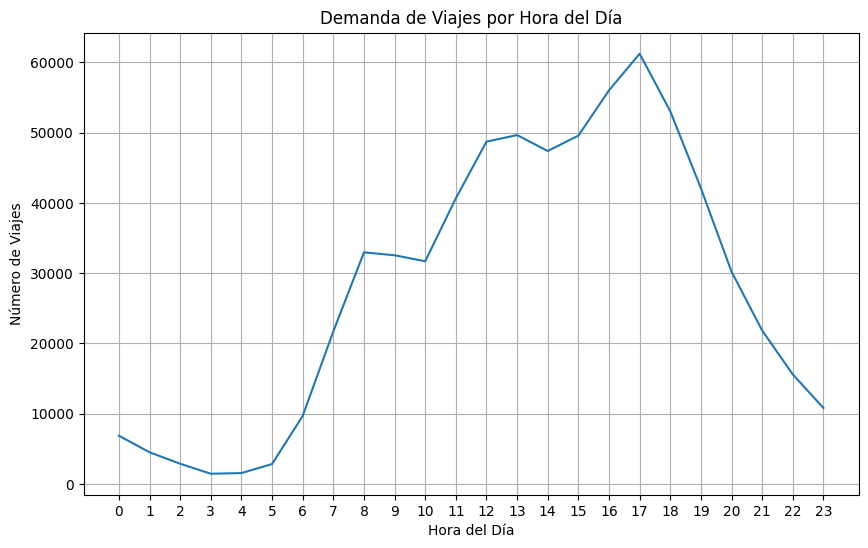

In [12]:
# Contar viajes por hora del día
hourly_demand = df.groupby('hour_of_day').size()

# Graficar la demanda por hora del día
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_demand.index, y=hourly_demand.values)
plt.title('Demanda de Viajes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes')
plt.grid(True)
plt.xticks(range(24))
plt.savefig('../plots/Demanda_de_Viajes_por_Hora_del_Día.png')
plt.show()


C:\Users\jacj2\AppData\Local\Temp\ipykernel_11136\1177698004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_demand.index, y=weekday_demand.values, palette='viridis')


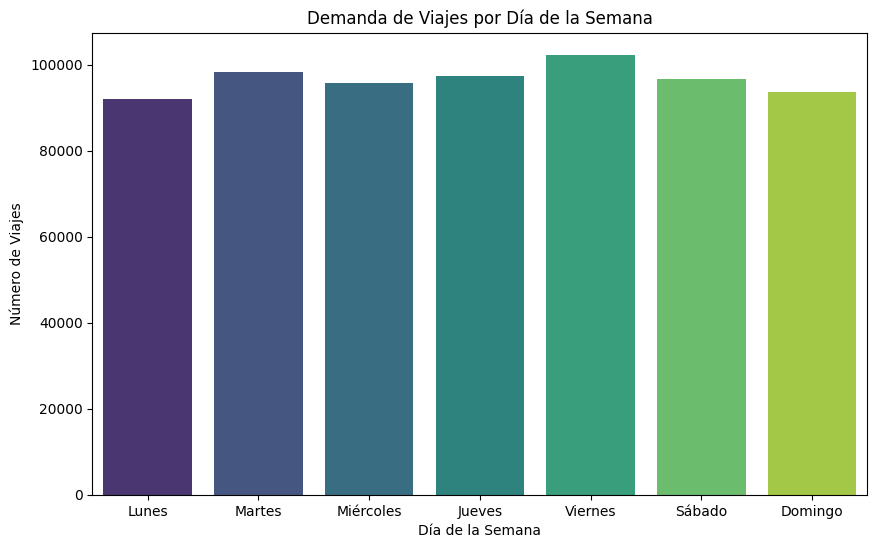

In [13]:
# Contar viajes por día de la semana
weekday_demand = df.groupby('day_of_week').size()

# Graficar la demanda por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_demand.index, y=weekday_demand.values, palette='viridis')
plt.title('Demanda de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Viajes')
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.savefig('../plots/Demanda_Viajes.png')
plt.show()


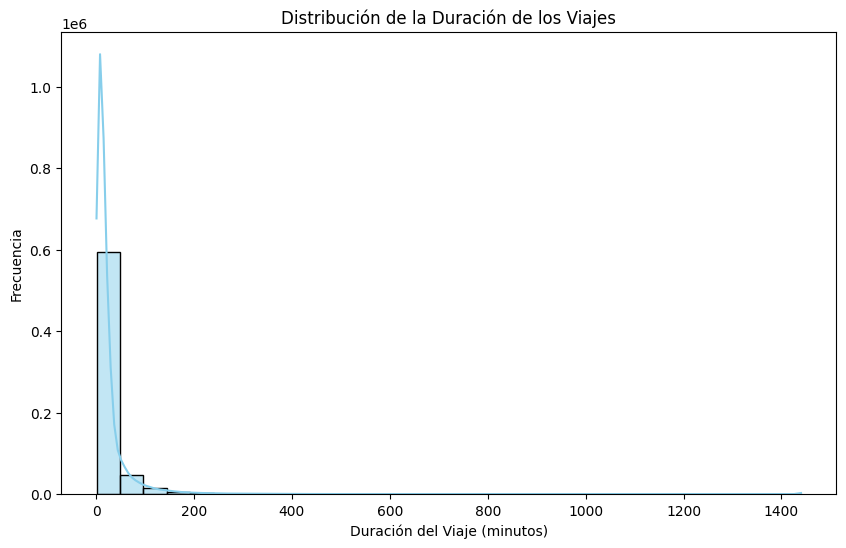

In [14]:
# Graficar la distribución de la duración de los viajes
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Duración de los Viajes')
plt.xlabel('Duración del Viaje (minutos)')
plt.ylabel('Frecuencia')
plt.savefig('../plots/Duración_Viajes.png')
plt.show()


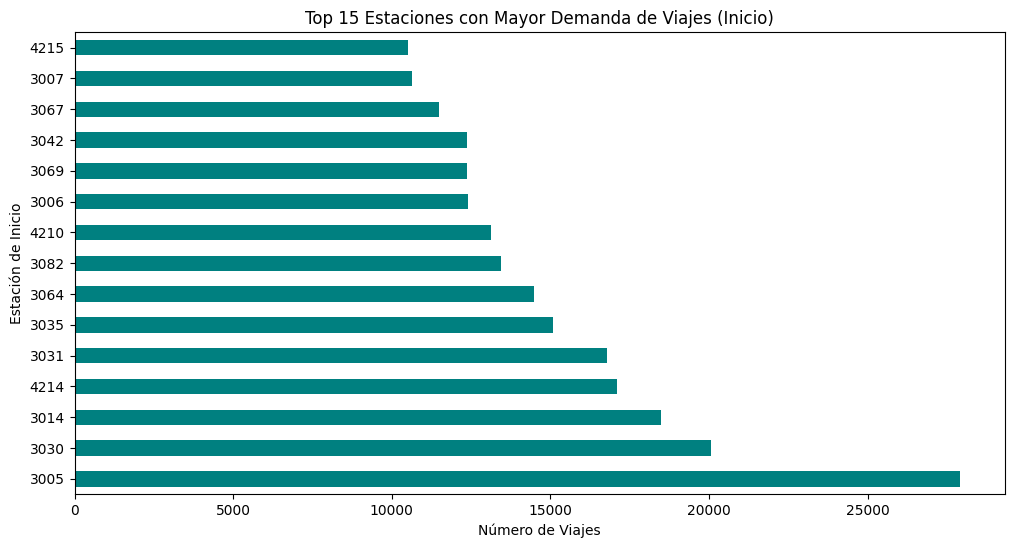

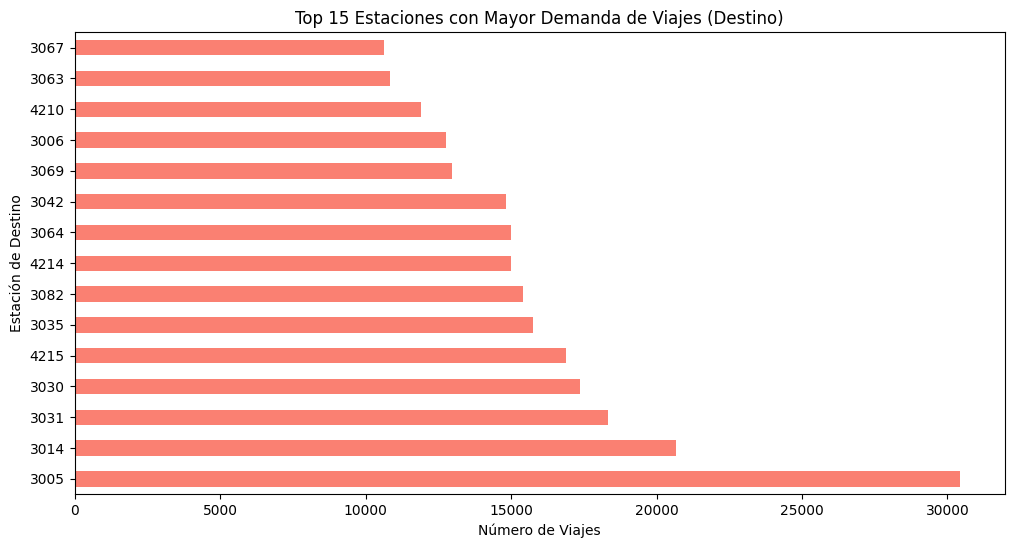

In [15]:
# Contar la cantidad de viajes por estación de inicio
start_station_demand = df['start_station'].value_counts()

# Graficar las estaciones con mayor demanda
plt.figure(figsize=(12, 6))
start_station_demand.head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Estaciones con Mayor Demanda de Viajes (Inicio)')
plt.xlabel('Número de Viajes')
plt.ylabel('Estación de Inicio')
plt.show()

# Contar la cantidad de viajes por estación de destino
end_station_demand = df['end_station'].value_counts()

# Graficar las estaciones con mayor demanda
plt.figure(figsize=(12, 6))
end_station_demand.head(15).plot(kind='barh', color='salmon')
plt.title('Top 15 Estaciones con Mayor Demanda de Viajes (Destino)')
plt.xlabel('Número de Viajes')
plt.ylabel('Estación de Destino')
plt.savefig('../plots/Estaciones-con_Mayor_Demanda.png')
plt.show()


C:\Users\jacj2\AppData\Local\Temp\ipykernel_11136\237855062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plan_demand.index, y=plan_demand.values, palette='plasma')


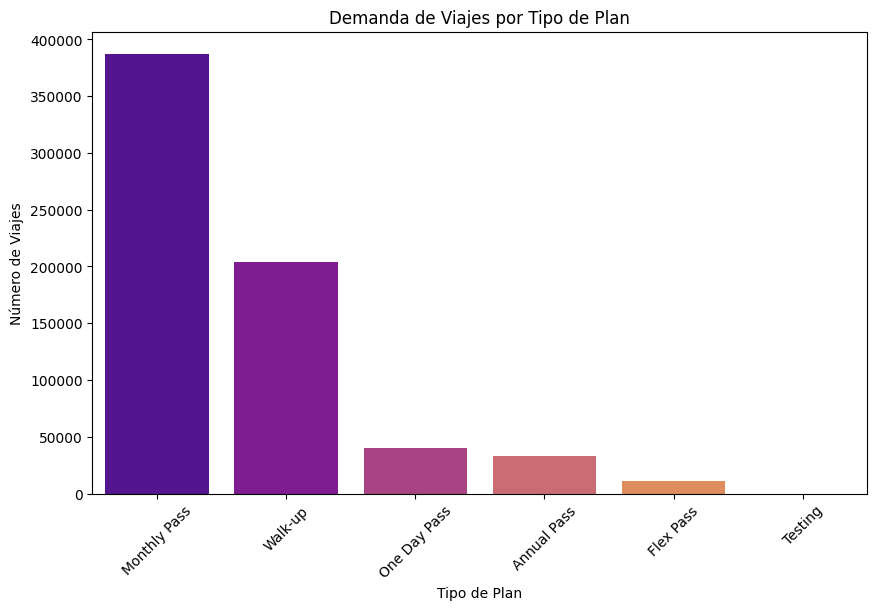

In [16]:
# Contar la cantidad de viajes por tipo de plan
plan_demand = df['passholder_type'].value_counts()

# Graficar la demanda por tipo de plan
plt.figure(figsize=(10, 6))
sns.barplot(x=plan_demand.index, y=plan_demand.values, palette='plasma')
plt.title('Demanda de Viajes por Tipo de Plan')
plt.xlabel('Tipo de Plan')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.savefig('../plots/Demanda_Viajes.png')
plt.show()


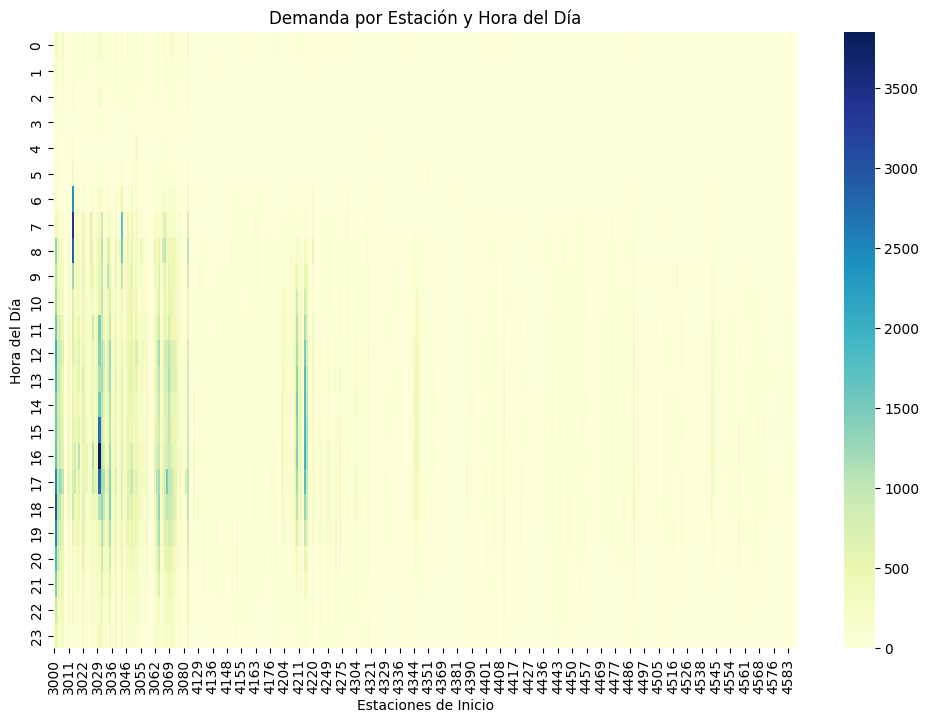

In [17]:
# Crear una tabla de demanda por estación y hora
station_hour_demand = df.groupby(['start_station', 'hour_of_day']).size().unstack(fill_value=0)

# Graficar las horas de mayor demanda por estación
plt.figure(figsize=(12, 8))
sns.heatmap(station_hour_demand.T, cmap='YlGnBu', cbar=True)
plt.title('Demanda por Estación y Hora del Día')
plt.xlabel('Estaciones de Inicio')
plt.ylabel('Hora del Día')
plt.savefig('../plots/Demanda_Viajes_Estación.png')
plt.show()


C:\Users\jacj2\AppData\Local\Temp\ipykernel_11136\2883917477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=round_trip_demand.index, y=round_trip_demand.values, palette='coolwarm')


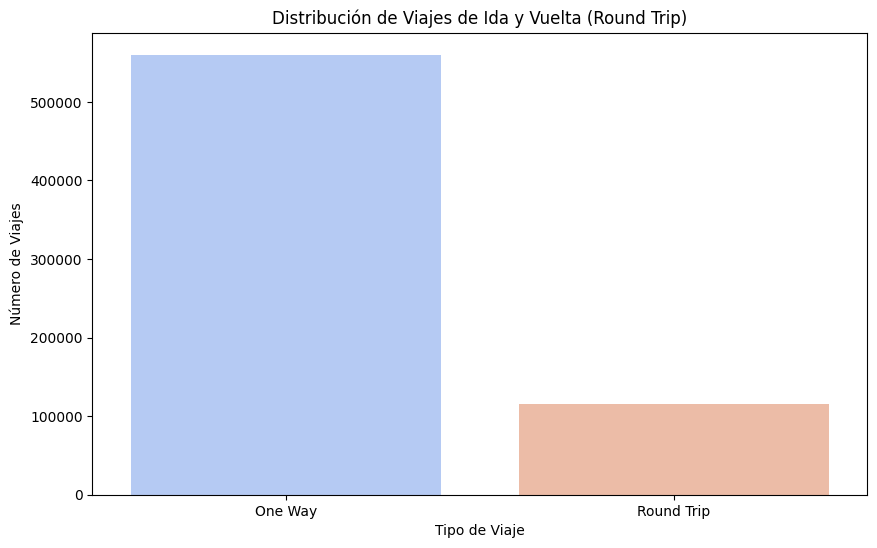

In [18]:
# Contar los viajes de tipo Round Trip
round_trip_demand = df['trip_route_category'].value_counts()

# Graficar la distribución de Round Trips
plt.figure(figsize=(10, 6))
sns.barplot(x=round_trip_demand.index, y=round_trip_demand.values, palette='coolwarm')
plt.title('Distribución de Viajes de Ida y Vuelta (Round Trip)')
plt.xlabel('Tipo de Viaje')
plt.ylabel('Número de Viajes')
plt.savefig('../plots/Demanda_Viajes_Ida_vuelta.png')
plt.show()


1.2 Analisis 
* Crecimiento de planes entre estaciones 
* Planificacion de bicicletas a tener ( Investigacion de operaciones pulp)

### Explicación del Modelo:
Variables de Decisión (bikes[station][h][plan]): Este es el número de bicicletas asignadas a cada estación, hora y tipo de plan (Mensual o Anual).

### Restricciones:

Demanda por estación y hora: Se asegura que la suma de las bicicletas asignadas (de los dos planes) cubra la demanda esperada para cada estación y cada hora.
Crecimiento de los planes anuales: Se establece que los planes anuales deben crecer un 50% más que los planes mensuales.
Capacidad máxima de cada estación: El número total de bicicletas asignadas a cada estación no puede exceder la capacidad máxima de esa estación, que se obtiene del número de bicicletas disponibles en el último año para cada estación.
### Función Objetivo:
El objetivo es minimizar el costo total de asignación de bicicletas. En este caso, se ha simplificado a minimizar el número total de bicicletas, pero también se podrían agregar costos adicionales si hay factores como costos de mantenimiento o distribución entre estaciones.

In [19]:
import pandas as pd
import pulp
from collections import defaultdict

# Obtener la última bicicleta de cada estación para determinar la capacidad máxima
last_year = df[df['start_time'].dt.year == df['start_time'].dt.year.max()]
bike_counts = last_year.groupby('start_station')['bike_id'].nunique()

# Definir la capacidad máxima de cada estación basada en las bicicletas del último año
capacity = bike_counts.to_dict()

# Crear una estructura de demanda por hora, considerando la tendencia de crecimiento de los planes
# Supongamos una demanda creciente para cada estación, por hora
stations = df['start_station'].unique()
hours = list(range(24))  # 24 horas en el día
plans = ['Mensual', 'Anual']
growth_factor_annual = 1.2  # Asumimos que el plan anual crece un 50% más

# Crear las variables de demanda de bicicletas por estación y hora (esto es solo un ejemplo)
demand = defaultdict(lambda: defaultdict(int))

# Calcular la demanda promedio por hora para cada estación en el último año
for station in stations:
    for hour in hours:
        demand[station][hour] = len(df[(df['start_station'] == station) & 
                                       (df['start_time'].dt.hour == hour)])

# Aumentar la demanda para los planes anuales
annual_demand_factor = {station: {h: growth_factor_annual * demand[station][h] for h in hours} for station in stations}


In [20]:
# Asegurar que todas las estaciones tengan capacidad definida
default_capacity = 0  # Puedes ajustar este valor según lo necesario
capacity = {station: capacity.get(station, default_capacity) for station in stations}

# Depurar estaciones sin capacidad
missing_stations = [station for station in stations if station not in capacity]
if missing_stations:
    print(f"Estaciones sin capacidad definida: {missing_stations}")
    # Opción: Excluir estas estaciones o asignarles una capacidad predeterminada
    for station in missing_stations:
        capacity[station] = default_capacity

# Crear el problema de optimización
model = pulp.LpProblem("Colocación_Efectiva_Bicicletas", pulp.LpMaximize)

# Variables: Número de bicicletas a asignar a cada estación, hora y tipo de plan
bikes = pulp.LpVariable.dicts("Bikes", (stations, hours, plans), lowBound=0, cat='Continuous')

# Variables de penalización por demanda insatisfecha
unmet_demand = pulp.LpVariable.dicts("UnmetDemand", (stations, hours), lowBound=0, cat='Continuous')

# Restricción 1: La demanda de bicicletas debe ser satisfecha o se penaliza
for station in stations:
    for h in hours:
        model += (
            pulp.lpSum([bikes[station][h][plan] for plan in plans]) + unmet_demand[station][h] 
            >= demand[station][h] + annual_demand_factor[station][h],
            f"Demanda_{station}_hora_{h}"
        )

# Restricción 2: El crecimiento de los planes anuales debe ser mayor o igual al factor definido
for station in stations:
    for h in hours:
        model += (
            bikes[station][h]['Anual'] >= growth_factor_annual * bikes[station][h]['Mensual'], 
            f"Plan_Anual_Min_{station}_hora_{h}"
        )

# Restricción 3: La capacidad máxima de cada estación no puede ser superada
for station in stations:
    model += (
        pulp.lpSum([bikes[station][h][plan] for h in hours for plan in plans]) <= capacity[station],
        f"Capacidad_Max_{station}"
    )

# Función objetivo: Maximizar la utilidad total (demanda satisfecha menos penalización)
model += pulp.lpSum([
    demand[station][h] - unmet_demand[station][h] 
    for station in stations 
    for h in hours
]), "Maximizar_Utilidad"

# Resolver el modelo
model.solve()

# Mostrar resultados
if model.status == pulp.LpStatusOptimal:
    print(f"Estado: {pulp.LpStatus[model.status]}")
    for station in stations:
        for h in hours:
            for plan in plans:
                print(f"Bicicletas asignadas a {station} en hora {h} para el plan {plan}: {bikes[station][h][plan].varValue}")
            print(f"Demanda no satisfecha en {station} hora {h}: {unmet_demand[station][h].varValue}")
else:
    print("No se encontró una solución óptima")


Estado: Optimal
Bicicletas asignadas a 3062 en hora 0 para el plan Mensual: 0.0
Bicicletas asignadas a 3062 en hora 0 para el plan Anual: 198.0
Demanda no satisfecha en 3062 hora 0: 0.0
Bicicletas asignadas a 3062 en hora 1 para el plan Mensual: 0.0
Bicicletas asignadas a 3062 en hora 1 para el plan Anual: 81.4
Demanda no satisfecha en 3062 hora 1: 0.0
Bicicletas asignadas a 3062 en hora 2 para el plan Mensual: 0.0
Bicicletas asignadas a 3062 en hora 2 para el plan Anual: 28.6
Demanda no satisfecha en 3062 hora 2: 44.0
Bicicletas asignadas a 3062 en hora 3 para el plan Mensual: 0.0
Bicicletas asignadas a 3062 en hora 3 para el plan Anual: 0.0
Demanda no satisfecha en 3062 hora 3: 22.0
Bicicletas asignadas a 3062 en hora 4 para el plan Mensual: 0.0
Bicicletas asignadas a 3062 en hora 4 para el plan Anual: 0.0
Demanda no satisfecha en 3062 hora 4: 59.4
Bicicletas asignadas a 3062 en hora 5 para el plan Mensual: 0.0
Bicicletas asignadas a 3062 en hora 5 para el plan Anual: 0.0
Demanda no 

In [21]:
# Modelo analitico 
df=df[['trip_id', 'duration','start_time', 'end_time', 'start_lat','start_lon', 'end_lat', 'end_lon', 'bike_id', 'plan_duration','trip_route_category', 'passholder_type', 'start_station','end_station']]

In [22]:
df['passholder_type'].unique()

array(['Monthly Pass', 'Walk-up', 'Flex Pass', 'One Day Pass',
       'Annual Pass', 'Testing'], dtype=object)